In [1]:
from rdkit import Chem

In [2]:
m = Chem.MolFromSmiles('Cc1ccccc1')

In [6]:
type(m)

rdkit.Chem.rdchem.Mol

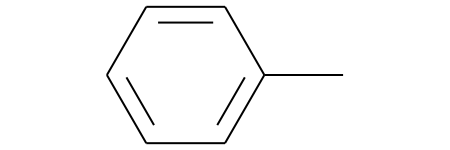

In [7]:
m

Reading sets of molecules

Groups of molecules are read using a Supplier (for example, an 
##### rdkit.Chem.rdmolfiles.SDMolSupplier or a 
##### rdkit.Chem.rdmolfiles.SmilesMolSupplier
):

An alternate type of Supplier, the 
###### *rdkit.Chem.rdmolfiles.ForwardSDMolSupplier*
can be used to read from file-like objects: This means that they can be used to read from compressed files

In [11]:
suppl = Chem.SDMolSupplier('/home/alessandro/workshop/Learning/CompBio/Data/5ht3ligs.sdf')

In [12]:
type(suppl)

rdkit.Chem.rdmolfiles.SDMolSupplier

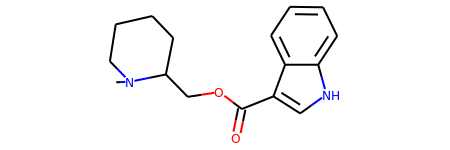

In [55]:
suppl[0]

### Writing molecules

In [14]:
Chem.MolToSmiles(suppl[0])

'CN1CCCCC1COC(=O)c1c[nH]c2ccccc12'

If you’d like to have the Kekule form of the SMILES, first Kekulize the molecule, then use the “kekuleSmiles” option:

Kekulization is the process of assigning double bonds to a molecular graph using the π-subgraph as a guide. Kekulization occurs before the assignment of virtual hydrogens. - https://depth-first.com/articles/2020/02/10/a-comprehensive-treatment-of-aromaticity-in-the-smiles-language/

More on Kekulization, Aromaticity and SMILES - https://www.slideshare.net/baoilleach/we-need-to-talk-about-kekulization-aromaticity-and-smiles

In [17]:
Chem.Kekulize(suppl[0])
Chem.MolToSmiles(suppl[0], kekuleSmiles=True)

'CN1CCCCC1COC(=O)C1:C:[NH]:C2:C:C:C:C:C:1:2'

#### Chem vs AllChem

The majority of “basic” chemical functionality (e.g. reading/writing molecules, substructure searching, molecular cleanup, etc.) is in the rdkit.Chem module. More advanced, or less frequently used, functionality is in rdkit.Chem.AllChem. The distinction has been made to speed startup and lower import times; there’s no sense in loading the 2D->3D library and force field implementation if one is only interested in reading and writing a couple of molecules. If you find the *Chem/AllChem* thing annoying or confusing, you can use python’s “import … as …” syntax to remove the irritation:

## Section on Mol blocks and 2D & 3D molecule coordinates

### Working with molecules

#### Atoms

In [25]:
m = Chem.MolFromSmiles('C1OC1')
for atom in m.GetAtoms():
        print(atom.GetAtomicNum())

6
8
6


In [26]:
m.GetAtomWithIdx(0).GetSymbol()

'C'

**Valence:** relating to or denoting electrons involved in or available for chemical bond formation

In [27]:
m.GetAtomWithIdx(0).GetExplicitValence()

2

#### Bonds

In [29]:
m = suppl[0]

In [31]:
m.GetBondWithIdx(0).GetBeginAtomIdx()

0

In [32]:
m.GetBondWithIdx(0).GetEndAtomIdx()

1

In [33]:
m.GetBondBetweenAtoms(0,1).GetBondType()

rdkit.Chem.rdchem.BondType.AROMATIC

In [30]:
for bond in m.GetBonds():
        print(bond.GetBondType())

AROMATIC
AROMATIC
AROMATIC
AROMATIC
SINGLE
AROMATIC
AROMATIC
AROMATIC
SINGLE
DOUBLE
AROMATIC
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
AROMATIC
AROMATIC
SINGLE


**Neighbours**

In [35]:
atom = m.GetAtomWithIdx(0)
[x.GetAtomicNum() for x in atom.GetNeighbors()]

[6, 6, 6]

In [36]:
len(atom.GetNeighbors()[-1].GetBonds())

2

**Ring information**

In [37]:
m = Chem.MolFromSmiles('OC1C2C1CC2')

*Atom* 

In [38]:
m.GetAtomWithIdx(0).IsInRing()

False

In [39]:
m.GetAtomWithIdx(1).IsInRing()

True

*Bond*

In [41]:
m.GetBondWithIdx(1).IsInRing()

True

*condition on ring size*

In [40]:
m.GetAtomWithIdx(2).IsInRingSize(3)

True

For more efficient queries about a molecule’s ring systems (avoiding repeated calls to **Mol.GetAtomWithIdx**), use the **rdkit.Chem.rdchem.RingInfo** class:

Can add in explicit hydrogens with **AddHs** function and then remove them with **RemoveHs**

## 2D depictions

In [90]:
from rdkit.Chem.rdDepictor import Compute2DCoords, Compute2DCoordsMimicDistmat, GenerateDepictionMatching2DStructure, GenerateDepictionMatching3DStructure
from rdkit.Chem.Draw import IPythonConsole

The 2D conformer is constructed in a canonical orientation and is built to minimize intramolecular clashes, i.e. to maximize the clarity of the drawing.

If you have a set of molecules that share a common template and you’d like to align them to that template, you can do so as follows:

In [80]:
template = Chem.MolFromSmiles('c1nccc2n1ccc2')
Compute2DCoords(template)

0

In [81]:
ms = [Chem.MolFromSmiles(smi) for smi in ('OCCc1ccn2cnccc12','C1CC1Oc1cc2ccncn2c1','CNC(=O)c1nccc2cccn12')]

In [82]:
for m in ms:
    _ = GenerateDepictionMatching2DStructure(m,template)

In [83]:
from rdkit.Chem import Draw

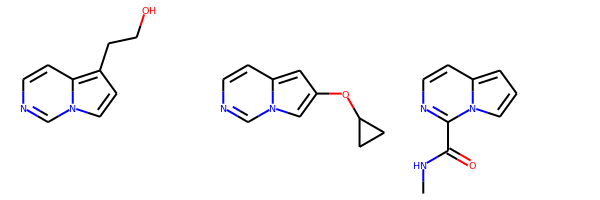

In [84]:
Draw.MolsToGridImage(ms)

without template

In [85]:
ms = [Chem.MolFromSmiles(smi) for smi in ('OCCc1ccn2cnccc12','C1CC1Oc1cc2ccncn2c1','CNC(=O)c1nccc2cccn12')]

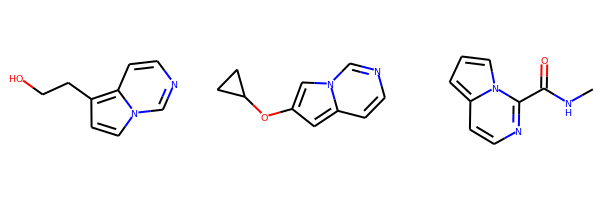

In [86]:
Draw.MolsToGridImage(ms)

### 3D depictions - cannot get it working (https://www.rdkit.org/docs/GettingStartedInPython.html#working-with-3d-molecules)

In [99]:
for m in ms:
    _ = GenerateDepictionMatching3DStructure(m, m)

ValueError: Bad Conformer Id

## Drawing molecules

The RDKit has some built-in functionality for creating images from molecules found in the rdkit.Chem.Draw package:

In [108]:
suppl =  Chem.SDMolSupplier('/home/alessandro/workshop/Learning/CompBio/Data/cdk2.sdf')

In [109]:
ms = [x for x in suppl if x is not None]

In [110]:
img=Draw.MolsToGridImage(ms[:8],molsPerRow=4,subImgSize=(200,200),legends=[x.GetProp("_Name") for x in ms[:8]])

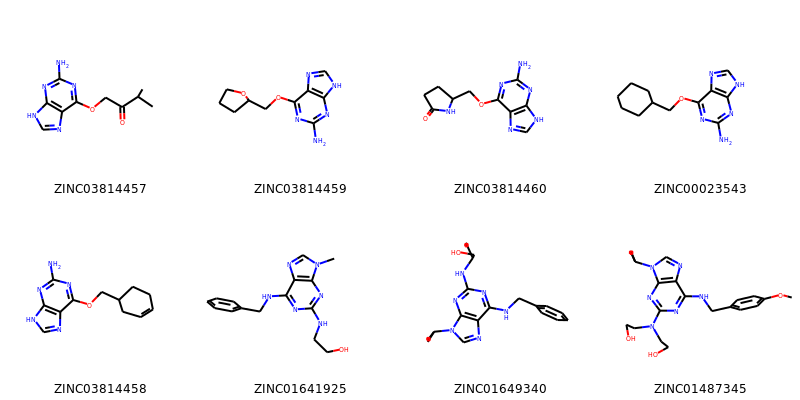

In [111]:
img

Align the common core

In [114]:
p = Chem.MolFromSmiles('[nH]1cnc2cncnc21')
subms = [x for x in ms if x.HasSubstructMatch(p)]
Compute2DCoords(p)
for m in subms:
 _ = GenerateDepictionMatching2DStructure(m,p)

In [115]:
img=Draw.MolsToGridImage(subms,molsPerRow=4,subImgSize=(200,200),legends=[x.GetProp("_Name") for x in subms])

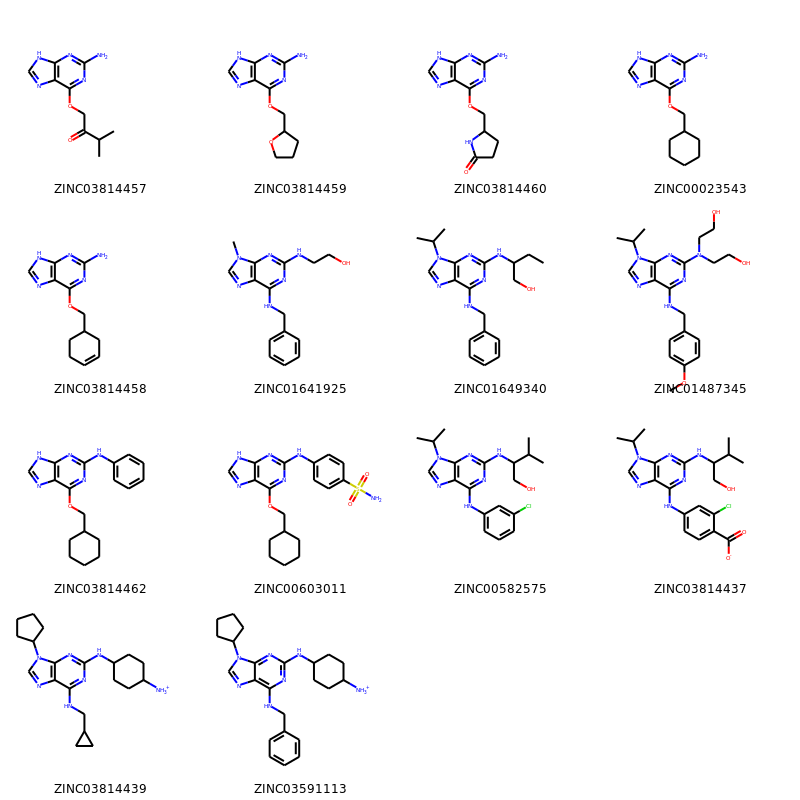

In [116]:
img

" 
Tip: The performance difference associated with storing molecules in a pickled form on disk instead of constantly reparsing an SD file or SMILES table is difficult to overstate. In a test I just ran on my laptop, loading a set of 699 drug-like molecules from an SD file took 10.8 seconds; loading the same molecules from a pickle file took 0.7 seconds. The pickle file is also smaller – 1/3 the size of the SD file – but this difference is not always so dramatic (it’s a particularly fat SD file).
"

Can highlight specific bonds or atoms as well

### Substructure searching